In [1]:
from pyspark import SparkContext
sc = SparkContext('yarn-client', 'wordcount')

In [2]:
import pydoop.hdfs as hdfs
hdfs.put('/var/log/ambari-agent/ambari-agent.log', '.')

In [3]:
words = sc.textFile('ambari-agent.log') \
 .flatMap(lambda x: x.lower().split(' ')) \
 .filter(lambda x: x.isalpha()).map(lambda x: (x, 1)) \
 .reduceByKey(lambda a,b: a+b)
    
words.take(5)

[(u'and', 6), (u'reset', 3), (u'old', 10), (u'file', 104), (u'tar', 14)]

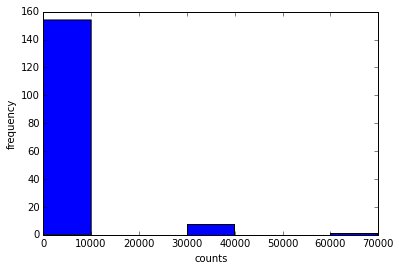

In [5]:
# Graph the distribution of word counts
plt.xlabel('counts')
plt.ylabel('frequency')
n, bins, patches = plt.hist([x[1] for x in words.collect()],7)

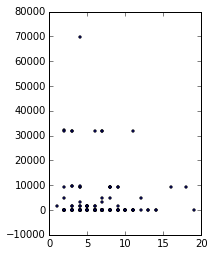

In [6]:
# Is there a relationship between word length and frequency?
x,y=[],[]
for word in words.collect():
  y.append(word[1]) # frequency
  x.append(len(word[0])) # word length
plot = plt.figure().add_subplot(121).scatter(x,y,s=5)